# Bike Sharing Analysis with Lyft - Baywheels Data

## Author : Pavan Sanjaykumar Agrawal

![alt text](https://upload.wikimedia.org/wikipedia/en/9/95/Bay_Wheels_logo.png "Baywheels Logo")

![alt text](http://static1.squarespace.com/static/5330a423e4b07cae635bb95e/53331a82e4b0528862e35ca9/5cfefc118b5f6400015a0f0a/1560800978391/vPrHTOga.png?format=1500w "Baywheels")

## Table of Contents
- [Introduction](#Introduction)
- [Part I - Gathering Data](#PartI)
- [Part II - Assessing Data](#PartII)
- [Part III - Cleaning Data](#PartIII)
- [Part IV - Univariate Exploration](#PartIV)
- [Part V - Bivariate Exploration](#PartV)
- [Part VI - Multivariate Exploration](#PartVI)
- [Part VII - Conclusion](#PartVII)

<a id='Introduction'></a>

## Introduction

Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I will perform an exploratory analysis on data provided by Lyft Baywheels, a bike-share system provider for the **FY 2018**.

<a id='PartI'></a>

## Part I - Gathering Data

Let's begin with gathering the data. Firstly, let us import all the libraries that we may require for this project.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import requests, zipfile, io, os
from bs4 import BeautifulSoup
%matplotlib inline

The data to be gathered was found on this [webpage](https://s3.amazonaws.com/baywheels-data/index.html). We may see that this page contains many links for downloading the zip files for several years and months. We would then have to extarct the csv files out of them and then convert them to a dataframe. After that, we would have to concatenate all the files to build up a master dataframe. But this entire process would take a lot of time, which could be saved if we complete the process of gathering the data programatically rather than manually.

For now, let's just download the page and save as a 'Complete Webpage', which would be used for analysis later. Apart from this manual download we would complete the entire data gathering process programmatically. We could have downloaded the html file programmatically as well by using Beautiful Soup, but the contents that we are interested in does not appear in the basic html file which would be extracted by Beautiful Soup.

In [2]:
with open ('Index of bucket _baywheels-data_.html') as file:
    soup = BeautifulSoup(file, 'lxml')

In [3]:
# let's filter out the html code lines that contain the urls
urls_scraped = soup.find_all('a')
urls_scraped

[<a href="https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip">2017-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip">201801-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip">201802-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip">201803-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip">201804-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip">201805-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip">201806-fordgobike-tripdata.csv.zip</a>,
 <a href="https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip">201807-fordgobike-tripdata.csv.zip</

In [4]:
# Now let's only extract the urls from the scraped url list.
url_list_allyrs = []
for url in urls_scraped:
    url_list_allyrs.append(url.get('href'))

In [5]:
url_list_allyrs

['https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201812-fordg

Now since we are interested in only the data for the Financial Year 2018. Let's filter out the urls which are not for FY 2018.

In [6]:
url_2018 = []
for url in url_list_allyrs:
    if '2018' in url:
        url_2018.append(url)

In [7]:
url_2018

['https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
 'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip']

In [8]:
# Creating the folder to store the zip files which would be extracted from the url_2018 list.
folder_name = 'zip_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [9]:
# Downloading the zip files
for url in url_2018: 
    r = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
       file.write(r.content)

In [10]:
# Let's check whether the download was successful or not
zip_list = os.listdir(folder_name)
zip_list

['201801-fordgobike-tripdata.csv.zip',
 '201802-fordgobike-tripdata.csv.zip',
 '201803-fordgobike-tripdata.csv.zip',
 '201804-fordgobike-tripdata.csv.zip',
 '201805-fordgobike-tripdata.csv.zip',
 '201806-fordgobike-tripdata.csv.zip',
 '201807-fordgobike-tripdata.csv.zip',
 '201808-fordgobike-tripdata.csv.zip',
 '201809-fordgobike-tripdata.csv.zip',
 '201810-fordgobike-tripdata.csv.zip',
 '201811-fordgobike-tripdata.csv.zip',
 '201812-fordgobike-tripdata.csv.zip']

In [11]:
# Creating a list containing month names to which we would store our data frame for that particular month
dfs=[]
i = 0
for zip in zip_list:
    dfs.append('Month'+'_'+str(i))
    i = i + 1
dfs

['Month_0',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11']

In [12]:
# Iterating and storing the dataframes in a list
i = 0
for zip in zip_list:
    path = 'C:/Users/Pavan/Google Drive/Courses/Data_Analytics/L5_Data_Visualization/Final_Project/zip_files/' + zip
    zf = zipfile.ZipFile(path)
    dfs[i] = pd.read_csv(zf.open((path.split('/')[-1].split('.')[0] + '.' + path.split('/')[-1].split('.')[1])))
    i = i + 1

In [13]:
# Let's check whether the dataframes turned out well or not. Checking for the month of January.
dfs[0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94797,695,2018-01-01 00:19:58.7610,2018-01-01 00:31:33.8320,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,-122.392741,3671,Customer,No
94798,600,2018-01-01 00:19:48.7610,2018-01-01 00:29:49.0740,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,19,Post St at Kearny St,37.788975,-122.403452,603,Customer,No
94799,1151,2018-01-01 00:09:31.7450,2018-01-01 00:28:43.1590,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,No
94800,714,2018-01-01 00:07:52.9430,2018-01-01 00:19:47.0750,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,No


In [14]:
# Let's concatenate all the dataframes together to create a master dataframe for the FY 2018.
pdList = [dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9], dfs[10], dfs[11]]  
master_df = pd.concat(pdList, ignore_index=True)
master_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No


Finally, the master dataframe for the financial year 2018 has been created. This dataframe contains 1863721 rows and 14 columns. We completed the **entire** process of gathering the data **programmatically**, which is a great thing as this can be reproduced again very easily on any system. Gathering the data programmatically helps to tackle the issue of reproduciblity and scalability.

<a id='PartII'></a>

## Part II - Assessing Data

The next step would be to access the `master_df` and look out for any quality or tidiness issues to address before we begin our exploratory analysis via visualizations.

In [15]:
# Visually accessing the first 5 records
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [16]:
# Visually assessing 50 random records
master_df.sample(25)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
981103,943,2018-07-07 17:54:10.2570,2018-07-07 18:09:53.9820,178.0,Broadway at 30th St,37.819381,-122.261928,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,2292,Subscriber,No
607212,485,2018-05-03 11:57:42.2580,2018-05-03 12:05:47.6790,321.0,5th at Folsom,37.780146,-122.403071,50.0,2nd St at Townsend St,37.780526,-122.390288,2228,Subscriber,Yes
655274,133,2018-06-26 13:56:44.1120,2018-06-26 13:58:57.3970,9.0,Broadway at Battery St,37.798572,-122.400869,14.0,Clay St at Battery St,37.795001,-122.399970,3572,Subscriber,No
1676021,392,2018-11-09 18:01:50.9800,2018-11-09 18:08:23.3210,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,277,Subscriber,No
95575,777,2018-02-28 18:14:26.4670,2018-02-28 18:27:23.7020,195.0,Bay Pl at Vernon St,37.812314,-122.260779,233.0,12th St at 4th Ave,37.795812,-122.255555,2534,Subscriber,No
1681821,383,2018-11-08 18:45:33.7660,2018-11-08 18:51:56.8080,81.0,Berry St at 4th St,37.775880,-122.393170,90.0,Townsend St at 7th St,37.771058,-122.402717,3241,Subscriber,No
1014509,890,2018-07-02 07:57:34.6140,2018-07-02 08:12:24.8520,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,22.0,Howard St at Beale St,37.789756,-122.394643,1605,Subscriber,No
431728,172,2018-04-03 19:26:33.2140,2018-04-03 19:29:26.1820,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3221,Subscriber,No
1349193,241,2018-09-09 21:38:28.7490,2018-09-09 21:42:30.4590,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,241.0,Ashby BART Station,37.852477,-122.270213,3634,Subscriber,No
1749905,1878,2018-12-26 11:25:04.5300,2018-12-26 11:56:23.0800,144.0,Precita Park,37.747300,-122.411403,86.0,Market St at Dolores St,37.769305,-122.426826,5543,Customer,No


In [17]:
# View info of the master dataframe
master_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [18]:
# Checking if duplicates exist
master_df.duplicated().sum()

0

In [19]:
# View descriptive statistics of the master dataframe
master_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


### Quality Issues
- `start_time` and `end_time` not in datetime format
- `bike_id`, `start_station_id` and `end_station_id` not in an object type
- `user type` and `gender and bike_share_for_all_trip` not set as a categorical type variable
-  Enhancement of the dataset with more details about the timestamps like month, day, hour, weekday

### Tidiness Issues
- There doesn't seem to be any tidiness issues as each variable forms a column and contains values, each observation forms a row, and each type of observational unit forms a table.

<a id='PartIII'></a>

## Part III - Cleaning Data

In [20]:
# Create a copy of the original Master DataFrame
df_clean = master_df.copy()

___
### Define
Set appropriate data types for fields mentioned in the Quality issues.

### Code

In [21]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [22]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [23]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

### Test

In [24]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
bike_share_for_all_trip    1863721 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 174.2+ MB


____
### Define
Enhancing the dataset with new date related fields like `month_name`, `month_number`, `weekday_name`, `start_time_date`, `start_time_hour`, `AM/PM`

### Code

In [25]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [26]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [27]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [28]:
# extract start time date
df_clean['start_time_date']=df_clean['start_time'].dt.day.astype(int)

In [29]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [30]:
# extract AM/PM
df_clean['AM/PM']=df_clean['start_time'].dt.strftime('%p')

In [31]:
# Converting the AM/PM column to category type
df_clean['AM/PM'] = df_clean['AM/PM'].astype('category')

### Test

In [32]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_month_name,start_time_month,start_time_weekday,start_time_date,start_time_hour,AM/PM
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,January,1,Wed,31,22,PM
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,January,1,Wed,31,16,PM
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,January,1,Wed,31,14,PM
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,January,1,Wed,31,14,PM
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,January,1,Wed,31,19,PM


In [33]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
bike_share_for_all_trip    1863721 non-null category
start_time_month_name      1863721 non-null object
start_time_month           1863721 non-null int32
start_time_weekday         1863721 non-null objec

In [34]:
# save cleaned data 
#df_clean.to_csv('clean_master_file.csv', index=False)

______
### What is the structure of your dataset?
>There were approx. 1,860,000 bike rides that happen in 2018 using Baywheels. 
>
>The dataset contained features about:
>- **trip duration**: start/end time, how long the trip took in seconds
>- **stations**: start/end station, name, geolocation (latitude/longitude)
>- **anonymized customer information**: user type whether customer or subscriber
>- **rented bikes**: bike ids
>
>The dataset was further enhanced with features that were found neccessary to perform interesting analysis:
>- **trip duration**: month, day, hour of the day, weekdate and AM/PM details

![alt text](https://s3.amazonaws.com/bklyner/bklyner/wp-content/uploads/2019/05/Citi-Bike-in-Lyft-app-screenshots.png "Application Screenshot")


### What is/are the main feature(s) of interest in your dataset?
>I'm most interested in figuring out and understanding the users' behaviors and personal details like;
>- Average riding duration
>- Average riding distance
>- Weekly day distribution
>- Trip duration distribution
>- Distribution of stations on the map
> - Service utilization for the users enrolled in Bike share for all program
>- Usage by User type, and many more
>
> Let us explore the dataset more via visualizations in Univariate, Bivariate and Multivariate comparisons and get deeper insights from it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> - Feature such as customer type could help us gain insight into how different rides are spread across different customer types 
> - Similarly variables like hour of the day, AM/PM could assist us in determining which part of the time corresponds with most traffic
> - Bike_share_for_all variable will provide details to the usage of the service by those enrolled in this service
> - Latitude and Longitude can be used to analyze the station locations and mean count of rides can be used to show the strength of these stations.

<a id='PartIV'></a>

## Part IV - Univariate Exploration

In [35]:
# Firstly let us set the order of some of our variables.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_month = pd.api.types.CategoricalDtype(ordered = True, categories = month_order)
df_clean['start_time_month_name'] = df_clean['start_time_month_name'].astype(ordered_month)

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_weekday = pd.api.types.CategoricalDtype(ordered = True, categories = weekday_order)
df_clean['start_time_weekday'] = df_clean['start_time_weekday'].astype(ordered_weekday)

hour_order = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
ordered_hour = pd.api.types.CategoricalDtype(ordered = True, categories = hour_order)
df_clean['start_time_hour'] = df_clean['start_time_hour'].astype(ordered_hour)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 20 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
bike_share_for_all_trip    category
start_time_month_name      category
start_time_month           int32
start_time_weekday         category
start_time_date            int32
start_time_hour            category
AM/PM                      category
dtypes: category(6), datetime64[ns](2), float64(4), int32(2), int64(1), object(5)
memory usage: 195.5+ MB


### Question 1. What is the monthly usage distribution of rides look like? Does Season affect the ride counts?

In [37]:
type_counts = df_clean.start_time_month_name.value_counts()
type_order = type_counts.index

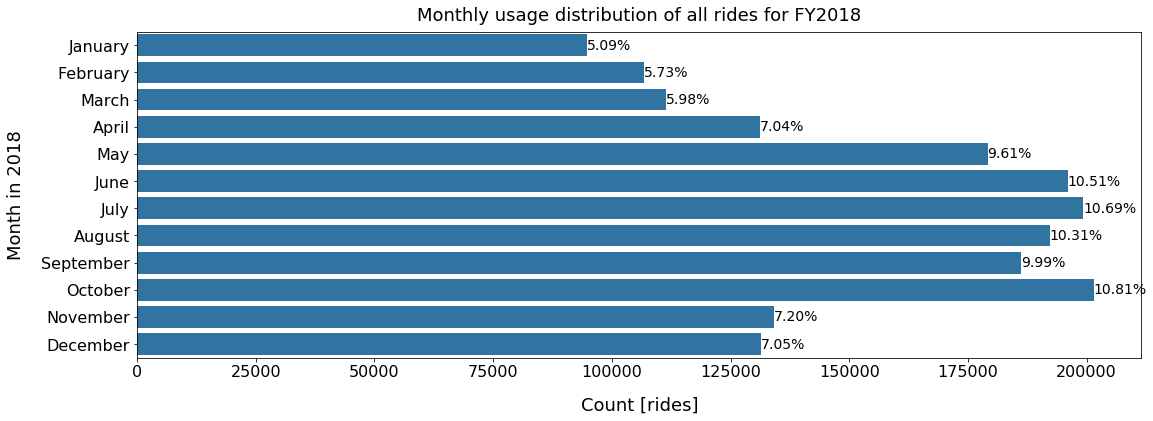

In [38]:
plt.figure(figsize=(18,6))
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, y = 'start_time_month_name', color = base_color)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/(df_clean.shape[0]))
    plt.text(count+1, i, pct_string, va='center', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Count [rides]', labelpad=16, fontsize=18)
plt.ylabel('Month in 2018', labelpad=16, fontsize=18)
plt.title('Monthly usage distribution of all rides for FY2018', fontsize=18, y=1.015);

**Inference :**
>It can be observed that the count of the number of rides is comparitively high from the month of May to October acccounting for about 9 to 10 percent of the total count, each month. In comparison to these months the counts for the cold months accounts for about approximately 5 to 7 percent of the total count, each month.

### Question 2. What is the weekly usage distribution of rides look like? Does Season affect the ride counts?

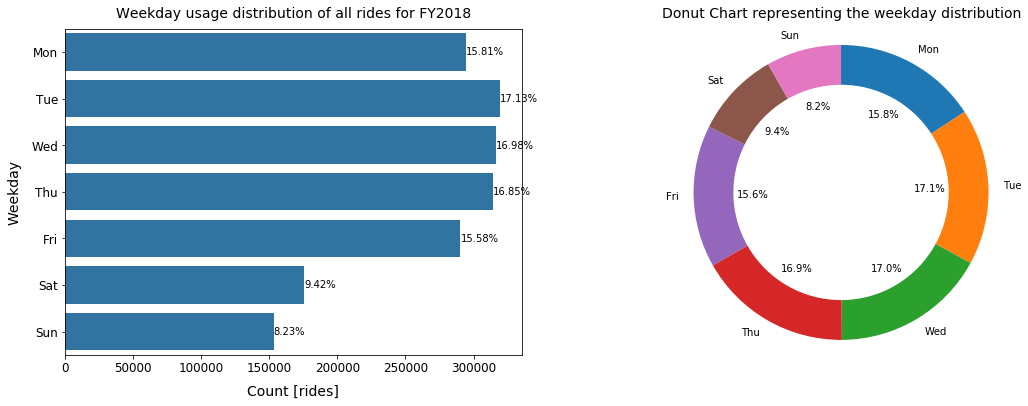

In [39]:
plt.figure(figsize = [18, 6]) # larger figure size for subplots

# bar chart on left
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
type_counts = df_clean.start_time_weekday.value_counts()
type_order = type_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, y = 'start_time_weekday', color = base_color)
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/(df_clean.shape[0]))
    plt.text(count+15, i, pct_string, va='center', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count [rides]', labelpad=10, fontsize=14)
plt.ylabel('Weekday', labelpad=10, fontsize=14)
plt.title('Weekday usage distribution of all rides for FY2018', fontsize=14, y=1.015);

# donut chart on right
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sorted_counts = df_clean.groupby('start_time_weekday').size()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.27}, autopct='%1.1f%%');
plt.axis('square')
plt.title("Donut Chart representing the weekday distribution", fontsize=14, y=1.015);

**Inference :**
>It can be observed that the count of the number of rides is comparitively high during the weekdays than the weekends.

### Question 3. What is the hourly usage distribution of rides look like?

In [40]:
trip_by_hour_df = df_clean.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour_df.head()

,start_time_hour,bike_id
0,0,10234
1,1,5884
2,2,3697
3,3,2120
4,4,2740


In [41]:
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100
trip_by_hour_df.head()

,start_time_hour,bike_id
0,0,0.549117
1,1,0.315712
2,2,0.198367
3,3,0.113751
4,4,0.147018


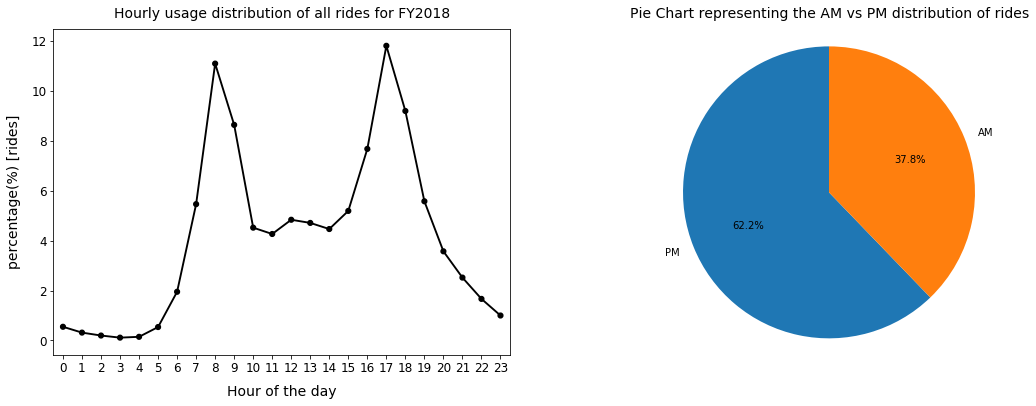

In [42]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='black', data=trip_by_hour_df)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hour of the day', labelpad=10, fontsize=14)
plt.ylabel('percentage(%) [rides]', labelpad=10, fontsize=14)
plt.title('Hourly usage distribution of all rides for FY2018', fontsize=14, y=1.015)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2;
sorted_counts = df_clean['AM/PM'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%');
plt.axis('square')
plt.title("Pie Chart representing the AM vs PM distribution of rides", fontsize=14, y=1.015);

**Inference :**
>The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and get back from work. >It can also be seen that there is a small bump in the graph at around 12-14pm which is the common lunch time for all.
>
> It can also be observed from the bar chart that the proportion of riders are more during PM rather than AM. It would be interesting to know this distribution around the weekends as people tend to enjoy ,relax and stay awake till late midnight during the weekends. 

### Question 4. Plot a distribution for the duration of ride to show the most common range of duration.

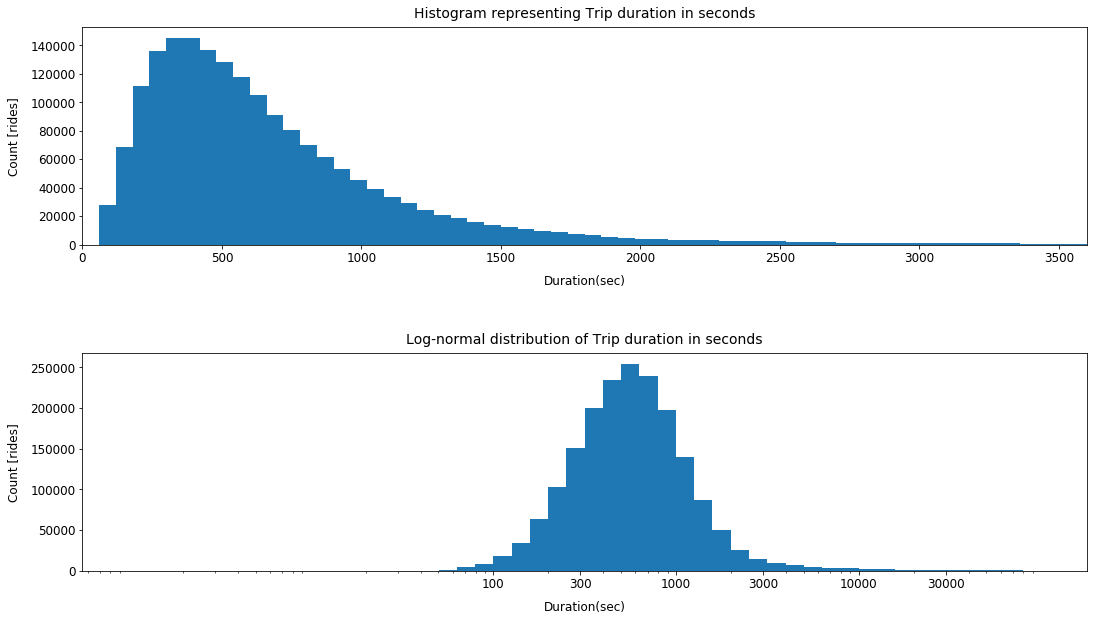

In [43]:
# code for the (histogram) duration (sec) distribution per user type
plt.figure(figsize=(18,10))

plt.subplot(2, 1, 1)
base_color = sb.color_palette()[0]
bin_edges = np.arange(0,df_clean['duration_sec'].max()+60,60)
plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Duration(sec)', labelpad=10, fontsize=12)
plt.ylabel('Count [rides]', labelpad=10, fontsize=12)
plt.title('Histogram representing Trip duration in seconds', fontsize=14, y=1.015)
plt.xlim(0,3600); # setting max at one hour

# Plotting the log normal distribution as the distribution above was heavily skewed to the right
plt.subplot(2, 1, 2)
base_color = sb.color_palette()[0]
log_data = np.log10(df_clean['duration_sec'].max())
log_bin_edges = 10 ** np.arange(0, log_data+0.1, 0.1)
plt.hist(data = df_clean, x = 'duration_sec', bins = log_bin_edges)
x_ticks = [100,300,1000,3000,10000,30000]
plt.xscale('log')
plt.xticks(x_ticks,x_ticks,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Duration(sec)', labelpad=10, fontsize=12)
plt.ylabel('Count [rides]', labelpad=10, fontsize=12)
plt.title('Log-normal distribution of Trip duration in seconds', fontsize=14, y=1.015)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.show();

**Inference :**
>Looking at the histogram and the log-normal distribution, we can see that most trip durations are between 6 to 15 min. Additionally more than 90 percent of the rides are less than 30 minutes/1800 seconds of duration. This can be explained by two facts:
>
>- The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
>
>- The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

### Question 5. How does the different User Type differ in their number of trips per year?

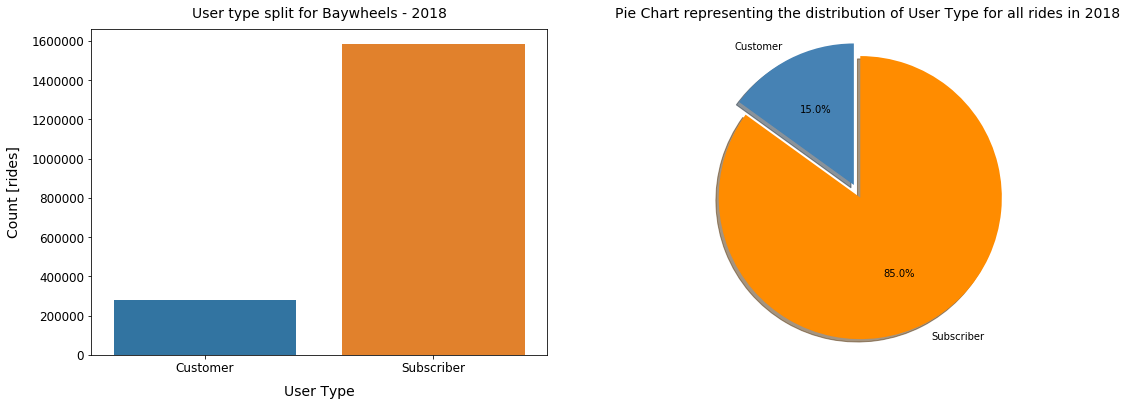

In [44]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.countplot(data = df_clean, x = 'user_type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Count [rides]', labelpad=10, fontsize=14)
plt.xlabel('User Type', labelpad=10, fontsize=14)
plt.title('User type split for Baywheels - 2018', fontsize=14, y=1.015)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2;
explode = (0, 0.1)
sorted_counts = df_clean['user_type'].value_counts()
plt.pie(sorted_counts, explode=explode, labels = sorted_counts.index,colors = ['darkorange', 'steelblue'], 
        autopct='%1.1f%%',shadow=True, counterclock = False, startangle = 90);
plt.axis('square')
plt.title("Pie Chart representing the distribution of User Type for all rides in 2018", fontsize=14, y=1.015);

**Inference :**
>The bike sharing system is mainly used by subscribers (85%) than ocassional riders (15%).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>I tried checking each variable of interest one by one. All these variables are important in order to understand the dataset and communicating the datafindings at the end of this project.
We can talk about some of the variables. For example:
- There were 1.85 million rides in the Financial Year 2018.
- People use this service on weekdays more than weekends.
- 8am and 5pm are the peak hours for this service. Also, people use this service when they are in lunch time as well.
- Services were less during the winter/cold months.
- Most trip durations were between 6 to 15 min.
>
>Additionally while observing the Histogram representing Trip duration in seconds, there were some unusual points having duration greater than 24 hour. However for our analysis focus was kept on the durations less than 3600 sec as approx. more than 90 percent of the rides were in this duration

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>As described that while observing the Histogram representing Trip duration in seconds, it was observed that there were some unusual points having duration greater than 24 hour which made the histogram heavily skewed to the right. Hence, log transformation was done to analyze the data better.
>
>Operations were performed to enhance the dataset with features that were found neccessary to perform interesting analysis like the information regarding the trip durations: month, day, hour of the day, weekdate, AM/PM details,and percentage of rides per hour.

<a id='PartV'></a>

## Part V - Bivariate Exploration

### Question 1. How does the different User Type differ in their number of trips per month?

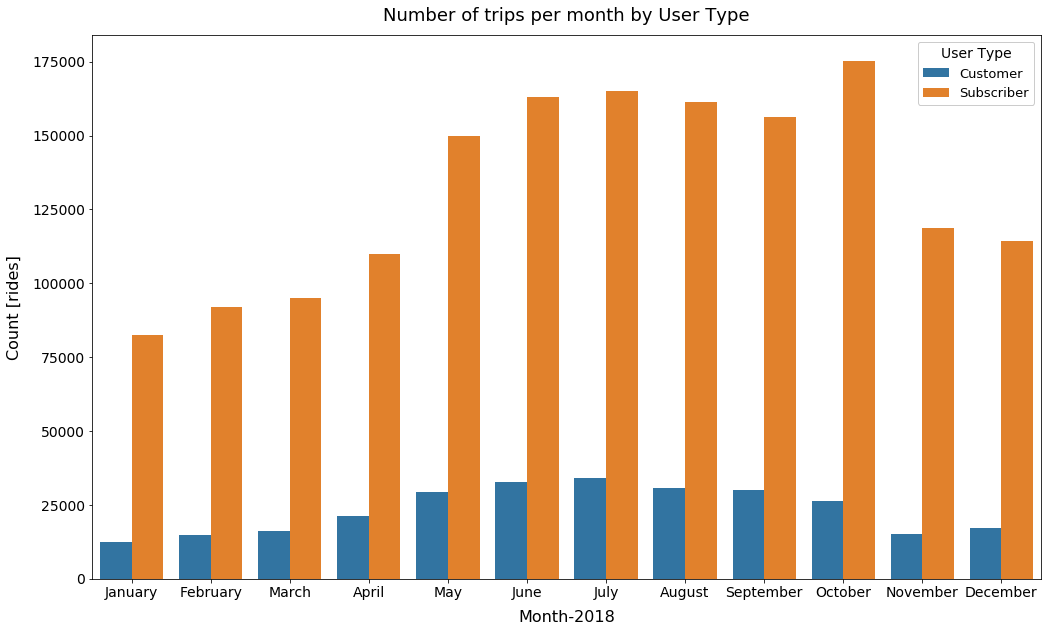

In [45]:
plt.figure(figsize=(17,10))
ax = sb.countplot(data = df_clean, x = 'start_time_month_name', hue = 'user_type')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count [rides]', labelpad=10, fontsize=16)
plt.xlabel('Month-2018', labelpad=10, fontsize=16)
plt.title('Number of trips per month by User Type', fontsize=18, y=1.015)
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'User Type', fontsize=13, title_fontsize=14);

**Inference:**
>Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather.
>
> - For **Customers**, the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. 
> - For **Subscribers**, the highest demand is from May till October, reaching it's peak in October. Subscribers are most probably regular riders using bikes for a daily commute.

### Question 2. How does the different User Type differ in their number of trips per weekday?

In [46]:
ht = df_clean.groupby(['user_type','start_time_weekday']).size()
ht = ht.reset_index()
ht = ht.pivot(index='start_time_weekday', columns='user_type', values=0)
ht

user_type,Customer,Subscriber
start_time_weekday,,
Mon,33759,260814
Tue,34147,285185
Wed,35334,281040
Thu,37515,276609
Fri,41469,248921
Sat,52869,122745
Sun,45074,108240


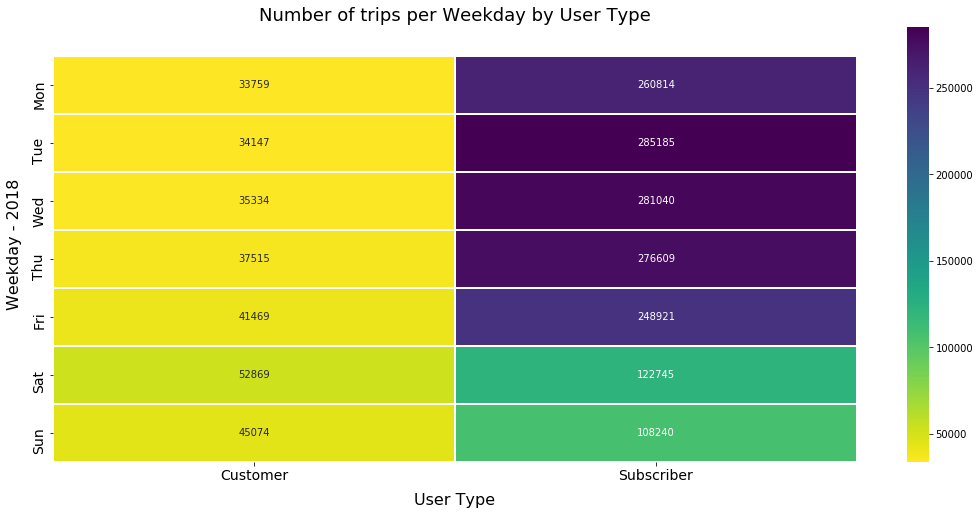

In [47]:
plt.figure(figsize=(18,8))
ax = sb.heatmap(ht, cmap = 'viridis_r', annot = True, fmt = 'd', linewidths=.5)
#ax.get_ylim()
ax.set_ylim(7.0,-0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Weekday - 2018', labelpad=10, fontsize=16)
plt.xlabel('User Type', labelpad=10, fontsize=16)
plt.title('Number of trips per Weekday by User Type', fontsize=18, y=1.015);

**Inference:**
>There is a different trend on which days customers and subscribers rent bikes. As mentioned above **customers** are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, **subscribers** are most probably daily work/school commuters who use the system within a week.

### Question 3. Plot the hourly usage of the bike share system per user type

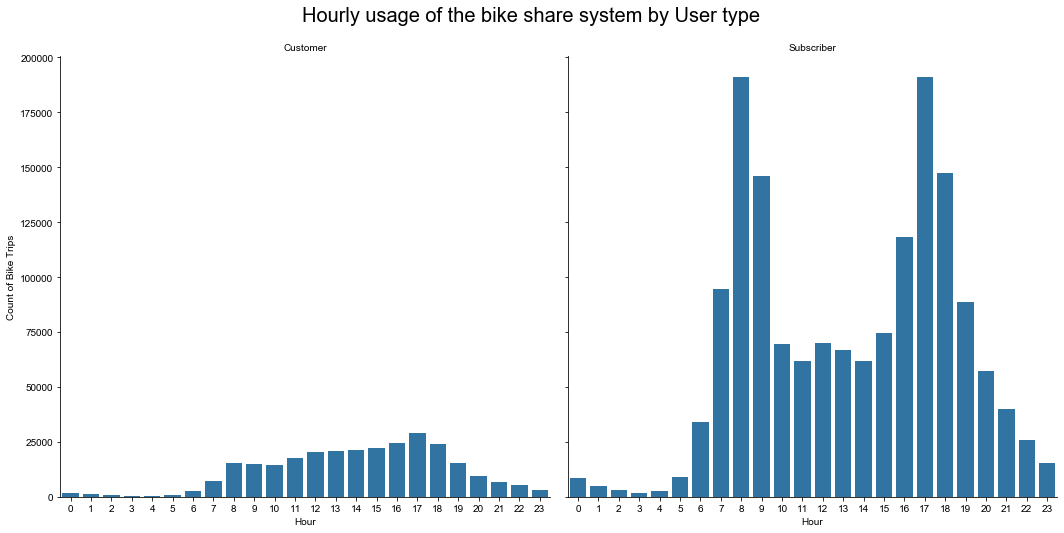

In [48]:
g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = True,
            color = base_color, height=4, aspect =1.5)
g.set_axis_labels("Hour", "Count of Bike Trips")
g.set_titles("{col_name}", fontsize=12)
g.fig.suptitle('Hourly usage of the bike share system by User type', y=1, fontsize=20)
g.fig.set_size_inches(15,8)
sb.set(font_scale = 1.5);

**Inference:**
>There is also a different trend of when during the day bikes are rented most often. **Customers** use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. **Subscribers** on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

### Question 4. Plot a distribution for the duration of ride to show the most common range of duration.

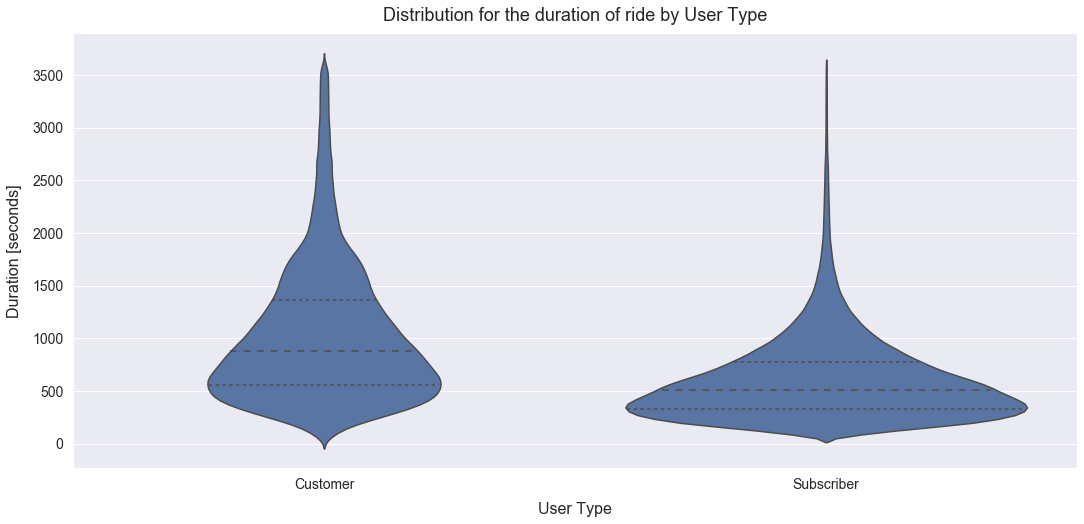

In [49]:
plt.figure(figsize=(18,8))
data = df_clean.query('duration_sec < 3600')
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = 'user_type', y = 'duration_sec', color = base_color,
              inner = 'quartile')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Duration [seconds]', labelpad=10, fontsize=16)
plt.xlabel('User Type', labelpad=10, fontsize=16)
plt.title('Distribution for the duration of ride by User Type', fontsize=18, y=1.015);

**Inference:**
>Looking at the violin plot and the inner quartiles, we can see that trip durations are _longer_ for **customers** (9 to 23 minutes) than for **subscribers** (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

### Question 5. Plot a distribution for the duration of ride vs Bike Share to show the most common range of duration.

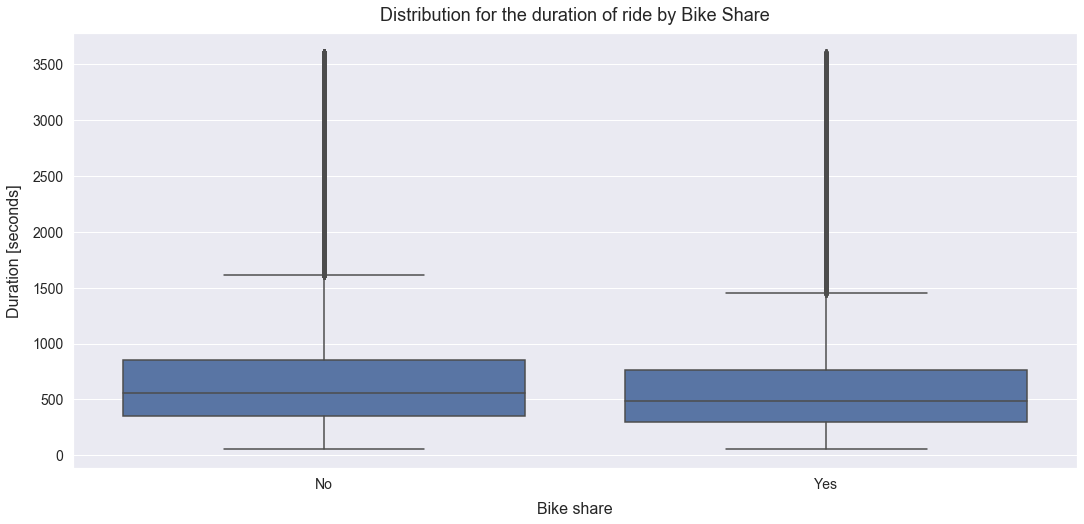

In [67]:
plt.figure(figsize=(18,8))
data = df_clean.query('duration_sec < 3600')
base_color = sb.color_palette()[0]
sb.boxplot(data = data, x = 'bike_share_for_all_trip', y = 'duration_sec', color = base_color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Duration [seconds]', labelpad=10, fontsize=16)
plt.xlabel('Bike share', labelpad=10, fontsize=16)
plt.title('Distribution for the duration of ride by Bike Share' , fontsize=18, y=1.015);

**Inference:**
> The average duration for the people enrolled in the Rideshare program is a little less than that of the ones that were not enrolled.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). Subscribers are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

<a id='PartVI'></a>

## Part VI - Multivariate Exploration

### Question 1. How does the ride trips differ by `user_type`, `start_time_weekday` and `AM/PM` variables?

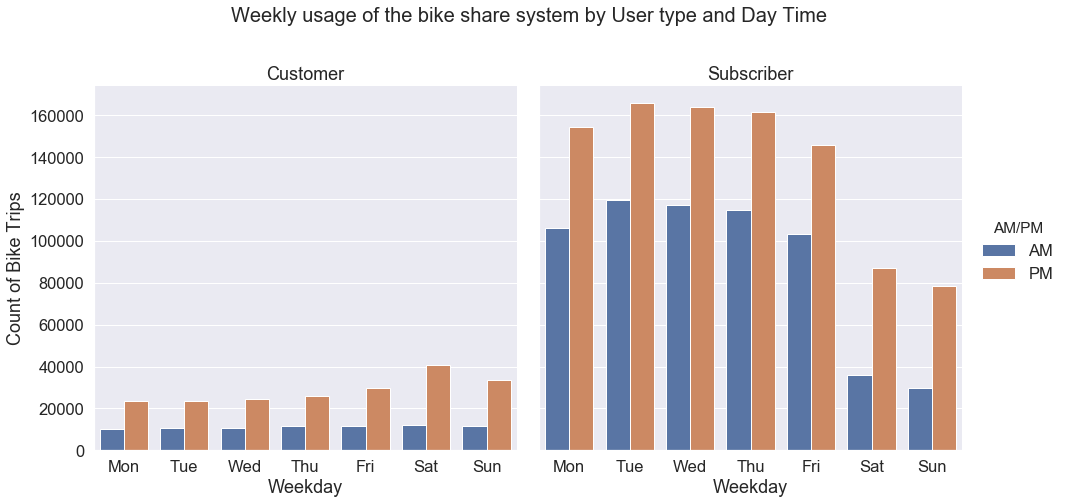

In [77]:
g = sb.catplot(data=df_clean, x='start_time_weekday', hue = "AM/PM", col = 'user_type' , kind='count', sharey = True, height=4, aspect =1.5)
g.set_axis_labels("Weekday", "Count of Bike Trips")
g.set_titles("{col_name}", fontsize=12)
g.fig.suptitle('Weekly usage of the bike share system by User type and Day Time', y=1, fontsize=20)
g.fig.set_size_inches(15,8)
sb.set(font_scale = 1.5);

**Inference:**
> It can be observed that there appears to be a spike in the number of rides during the weekend for customers during 'PM' in contradiction to the subscribers, where the number of rides during weekend decreases during PM. This decrease can be accounted due to the fact that the population using Baywheels services for getting back from work are not using the services on weekends.
>
>Similarly the increase in the customer section during the weekend suggest that those are casual tourists who use the services on weekends to explore around themselves.

### Question 2. Plot a distribution for the Hourly Usage for all weekdays by `user_type` and `bike_share_for_all_trip` variables.

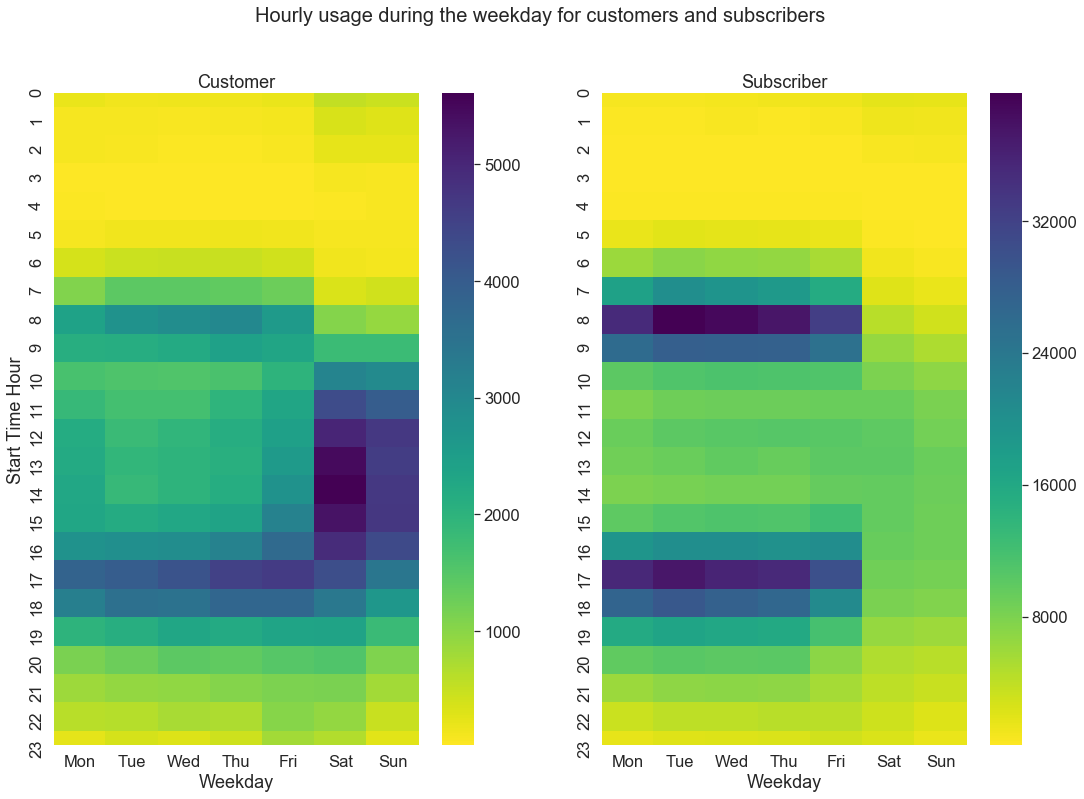

In [83]:
plt.figure(figsize=(18,12))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=20)

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="viridis_r")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="viridis_r")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

**Inference:**
>The plot perfectly summarizes in one place the diffrent trends for customers and subscribers.
>
>**Customers use the bike sharing system more often on weekends:**
>- weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
>- weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm.
>
>**Subscribers use the bike sharing system mainly on weekdays:**
>- weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
>- weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting the number of bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.

### Were there any interesting or surprising interactions between features?
> As talked earlier, we wanted to know whether the customers rode the bikes in the late night/early mornings during the weekend or not. As seen from the heat map, we can see that the early hours during the weekend have some rides which are prominently taken by the customers. This confirms our analysis regarding the customers being casual travellers and subscribers being the working professionals in majority.

<a id='PartVII'></a>

## Part VII - Conclusion

![alt text](https://images.squarespace-cdn.com/content/v1/5330a423e4b07cae635bb95e/1543471169705-I7VOP0TCD48VVLLHWXU0/ke17ZwdGBToddI8pDm48kPG1NNr9uO4BVXyZlPsCQ-h7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0k6sq9GEl9ZUDkp1sRKcAyIni6DKaP3EqkudS3LYFfWw1fSIFsuPfK_pM9aViLM1jg/Lyft+bike.jpg?format=2500w "Lyft Bike")

On Jan 14, 2020 Baywheels completed 5 Million Rides. For our analysis there were 1.85 million rides (during the year of 2018). It was observed that the people use this service on weekdays more than weekends. 8am and 5pm are the peak hours for this service. Also, people use this service when they are in lunch time as well. Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85. 90% of bike rides take place on weekday. The peak bike rides time for all members is around commute time.
The bikes are used by the customers during the late night on the weekends as we expected. Customers' usage is mostly during the evenings around 5-6pm during the weekdays and whole day during the weekends. Multivariate analysis helped us a lot in getting a good perspective of our data and it will be proved essential in communicating the data findings to our clients.